In [1]:
import nltk
import sklearn
import pandas as pd
import numpy as np
import re
import string
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from sklearn.datasets import fetch_20newsgroups

In [3]:
categories = fetch_20newsgroups().target_names

In [4]:
train= fetch_20newsgroups(subset="train" ,categories = categories) 

In [5]:
test= fetch_20newsgroups(subset="test" ,categories = categories) 

In [6]:
df = pd.DataFrame(train["data"], columns=["text"])
df["target"] = train["target"]
print(df.head())

df_test = pd.DataFrame(test["data"], columns=["text"])
df_test["target"] = test["target"]
print(df_test.head())

                                                text  target
0  From: lerxst@wam.umd.edu (where's my thing)\nS...       7
1  From: guykuo@carson.u.washington.edu (Guy Kuo)...       4
2  From: twillis@ec.ecn.purdue.edu (Thomas E Will...       4
3  From: jgreen@amber (Joe Green)\nSubject: Re: W...       1
4  From: jcm@head-cfa.harvard.edu (Jonathan McDow...      14
                                                text  target
0  From: v064mb9k@ubvmsd.cc.buffalo.edu (NEIL B. ...       7
1  From: Rick Miller <rick@ee.uwm.edu>\nSubject: ...       5
2  From: mathew <mathew@mantis.co.uk>\nSubject: R...       0
3  From: bakken@cs.arizona.edu (Dave Bakken)\nSub...      17
4  From: livesey@solntze.wpd.sgi.com (Jon Livesey...      19


In [7]:
df["text"] = df["text"].str.lower()
df_test["text"] = df_test["text"].str.lower()

In [8]:
stop = stopwords.words('english')

In [9]:
email = re.compile(r'\S+@\S+')
df['text'] = df['text'].apply(lambda x : email.sub(r'', x))
df_test["text"] = df_test["text"].apply(lambda x : email.sub(r'', x))

In [10]:
html = re.compile(r'<.*?>')
df['text'] = df['text'].apply(lambda x: html.sub(r'', x))
df_test["text"] = df_test["text"].apply(lambda x: html.sub(r'', x))

In [11]:
table = str.maketrans('', '', string.punctuation)
df['text'] = df['text'].apply(lambda x: x.translate(table))
df_test["text"] = df_test["text"].apply(lambda x: x.translate(table))

In [12]:
url = re.compile(r'https?://\S+|www\.\S+')
df['text'] = df['text'].apply(lambda x : url.sub(r'', x))
df_test["text"] = df_test["text"].apply(lambda x : url.sub(r'', x))

In [13]:
df.head()

,text,target
0,from wheres my thing\nsubject what car is thi...,7
1,from guy kuo\nsubject si clock poll final ca...,4
2,from thomas e willis\nsubject pb questions\no...,4
3,from joe green\nsubject re weitek p9000 \norg...,1
4,from jonathan mcdowell\nsubject re shuttle la...,14


In [14]:
df_test.head()

,text,target
0,from neil b gandler\nsubject need info on 888...,7
1,from rick miller \nsubject xface\norganization...,5
2,from mathew \nsubject re strong weak atheism\...,0
3,from dave bakken\nsubject re saudi clergy con...,17
4,from jon livesey\nsubject re after 2000 years...,19


In [15]:
df["text"] = df["text"].apply(lambda line: line[5:])
df_test["text"] = df_test["text"].apply(lambda line: line[5:])

In [16]:
df["text"] = df["text"].apply(lambda line: line.replace("\n", " "))
df_test["text"] = df_test["text"].apply(lambda line: line.replace("\n", " "))

In [17]:
df["text"]

0         wheres my thing subject what car is this nntp...
1         guy kuo subject si clock poll  final call sum...
2         thomas e willis subject pb questions organiza...
3         joe green subject re weitek p9000  organizati...
4         jonathan mcdowell subject re shuttle launch q...
                               ...                        
11309     jim zisfein  subject re migraines and scans d...
11310     subject screen death mac plus512 lines 22 org...
11311     will estes subject mounting cpu cooler in ver...
11312     steven collins subject re sphere from 4 point...
11313     kevin j gunning subject stolen cbr900rr organ...
Name: text, Length: 11314, dtype: object

In [18]:
df_test["text"]

0        neil b gandler subject need info on 8889 bonn...
1       rick miller  subject xface organization just m...
2       mathew  subject re strong  weak atheism organi...
3        dave bakken subject re saudi clergy condemns ...
4        jon livesey subject re after 2000 years can w...
                              ...                        
7527     stupendous man subject re temperature of the ...
7528     jim smyton subject re monitors  should they b...
7529     subject re game length was re braves update o...
7530      subject intel chmos 80868088 design kit news...
7531     subject re homosexuality issues in christiani...
Name: text, Length: 7532, dtype: object

In [19]:
def text_process(text):
    """
    1. Remove punctuations
    2. Remove stop words
    3. Return list of clean text words
    """
    
    return [word for word in text.split() if word.lower() not in stopwords.words('english')]

In [20]:
df["text"] = df["text"].apply(text_process)

In [21]:
df_test["text"] = df_test["text"].apply(text_process)

In [22]:
def list_to_string(text):
    line = ""
    for word in text:
        line += word + " "
    return line.strip()

In [23]:
df["text"] = df["text"].apply(list_to_string)

In [24]:
df_test["text"] = df_test["text"].apply(list_to_string)

In [25]:
df.head()

,text,target
0,wheres thing subject car nntppostinghost rac3w...,7
1,guy kuo subject si clock poll final call summa...,4
2,thomas e willis subject pb questions organizat...,4
3,joe green subject weitek p9000 organization ha...,1
4,jonathan mcdowell subject shuttle launch quest...,14


In [26]:
df_test.head()

,text,target
0,neil b gandler subject need info 8889 bonnevil...,7
1,rick miller subject xface organization lines 1...,5
2,mathew subject strong weak atheism organizatio...,0
3,dave bakken subject saudi clergy condemns debu...,17
4,jon livesey subject 2000 years say christian m...,19


In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df["text"])

In [29]:
text_bow = bow_transformer.transform(df["text"])

In [30]:
print(text_bow.shape)

(11314, 116709)


In [31]:
text_bow.nnz

1279237

In [32]:
test_bow = bow_transformer.transform(df_test["text"])

In [33]:
print(test_bow.shape)

(7532, 116709)


In [34]:
test_bow.nnz

785399

In [35]:
from sklearn.feature_extraction.text import TfidfTransformer

In [36]:
tfidf_transformer = TfidfTransformer().fit(text_bow)

In [37]:
text_tfidf = tfidf_transformer.transform(text_bow)

In [38]:
test_tfidf = tfidf_transformer.transform(test_bow)

In [39]:
from sklearn.naive_bayes import MultinomialNB

In [40]:
nb_model = MultinomialNB().fit(text_tfidf, df["target"])

In [41]:
all_pred_nb = nb_model.predict(test_tfidf)

In [42]:
from sklearn.neighbors import NearestCentroid

In [43]:
rocchio_model = NearestCentroid().fit(text_tfidf, df["target"])

In [44]:
all_pred_rc = rocchio_model.predict(test_tfidf)

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
knn_model = KNeighborsClassifier().fit(text_tfidf, df["target"])

In [47]:
all_pred_knn = knn_model.predict(test_tfidf)

In [48]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [49]:
print("Precision score for Naive Bayse classifier")
precision_score(df_test["target"], all_pred_nb, average='macro')

Precision score for Naive Bayse classifier


0.8440664619833106

In [50]:
print("Recall score for Naive Bayse classifier")
recall_score(df_test["target"], all_pred_nb, average='macro')

Recall score for Naive Bayse classifier


0.7927306029440622

In [51]:
print("f1 score for Naive Bayse classifier")
f1_score(df_test["target"], all_pred_nb, average='macro')

f1 score for Naive Bayse classifier


0.7887799706600179

In [52]:
print("Precision score for Rocchio classifier")
precision_score(df_test["target"], all_pred_rc, average='macro')

Precision score for Rocchio classifier


0.7882382589812567

In [53]:
print("Recall score for Rocchioclassifier")
recall_score(df_test["target"], all_pred_rc, average='macro')

Recall score for Rocchioclassifier


0.7467320574290677

In [54]:
print("f1 score for Rocchio classifier")
f1_score(df_test["target"], all_pred_rc, average='macro')

f1 score for Rocchio classifier


0.7572359970423328

In [55]:
print("Precision score for KNN classifier")
precision_score(df_test["target"], all_pred_knn, average='macro')

Precision score for KNN classifier


0.7326106692490887

In [56]:
print("Recall score for Rocchioclassifier")
recall_score(df_test["target"], all_pred_knn, average='macro')

Recall score for Rocchioclassifier


0.7271830853441681

In [57]:
print("f1 score for KNN classifier")
f1_score(df_test["target"], all_pred_knn, average='macro')

f1 score for KNN classifier


0.7268841179177297

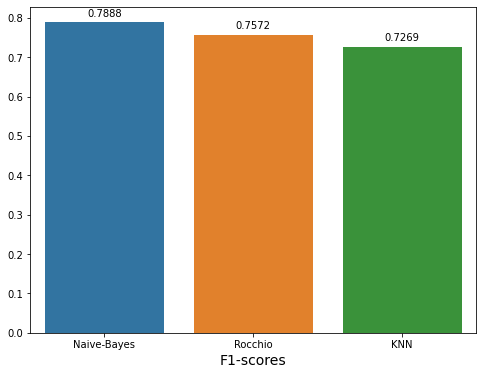

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

population=[0.844, 0.732, 0.788]
cv_metrics = pd.DataFrame({"Naive-Bayes": 0.7887799706600179,
                           "Rocchio": 0.7572359970423328,
                          "KNN": 0.7268841179177297
                          },
                         index=[0])
plt.figure(figsize=(8, 6))
splot=sns.barplot(data=cv_metrics)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.4f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("F1-scores", size=14);

